# Literature Review Survey Processing

In [323]:
from datetime import datetime
import re
from collections import Counter
from  itertools import chain

In [324]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

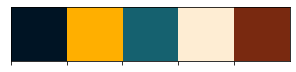

In [400]:
# color palette from Nancy's website
pclabcol = ['#001424','#FFAF00', '#15616F', '#FEEDD3', '#792910']
pclabcol2 = ['#001424','#FFAF00', '#15616F', '#792910']
sns.palplot(sns.color_palette(pclabcol))
my_colors = ListedColormap(sns.color_palette(pclabcol))
my_colors2 = ListedColormap(sns.color_palette(pclabcol2))

In [384]:
# Plot Specifics
TITLESIZE = 60
AXESLABEL = 40
AXESTICKS = 35
LINWID = 10
DOTS = 20
LEGSIZE = 25

In [327]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [328]:
survey_df = pd.read_csv("Copy of Literature Review (Responses) - Copy of Form Responses 1.csv", keep_default_na=False)
#fill in an NaNs with actual data so this keep default nonsense isnt needed



In [329]:
survey_df.head()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,"If female, ovariectiomized?",Social Agent Identity,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?"
0,6/16/2022 16:43:19,Behavioral deficits and progressive neuropatho...,"Yin, Fangfang",2010-12,Ryo Iwata,,yes,Mice,no,C57BL/6 mixed C57BL/6J mixed CD1,...,,unspecified female,does not specify,Does not specify,WT (wild type),yes,Yes,None,"Yes, this one was tricky.",Subject strain is hard to follow. Not sure if ...
1,3/1/2022 10:55:55,Learning and Memory and Synaptic Plasticity Ar...,"Moretti, Paolo",2006-01,Meghan Cum,,yes,Mice,no,129/SvEv,...,,juvenile male,Does not specify,Does not specify,WT (wild type),no,No,,,
2,3/1/2022 11:13:32,Early life modulators and predictors of adult ...,"Akers, Katherine",2006-07,Meghan Cum,,yes,Rats,no,Long-Evans,...,,adult not specified,singly-housed,Does not specify,WT (wild type),no,No,"Age, Strain, Housing History, Type (WT vs tran...",,
3,3/24/2022 13:10:08,Pharmacological effects of Ibuprofen on learni...,"Hashmi, Aisha",2015-04,Meghan Cum,,yes,Mice,no,BALB/c,...,,does not specify,Does not specify,Does not specify,WT (wild type),yes,Yes,Type (WT vs transgenic),"No, I feel confident, and I double-checked all...",
4,3/30/2022 15:35:44,The selective 5-HT6 receptor antagonist SLV ha...,"de Bruin, N.M.W.J.",2016-09,Jocelyn Santiago Perez,,yes,Rats,no,Wistar (Han) rats,...,,adult not specified,group-housed,Does not specify,WT (wild type),no,No,"Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",


In [330]:
survey_df.tail()

,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",Species,Wild Rodents Used? (like literally caught from the wild),Subject Strain (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black,...,"If female, ovariectiomized?",Social Agent Identity,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?"
664,6/16/2022 12:47:18,Effects of Bax gene deletion on social behavio...,"Holmes, M.M.",2011,Meghan Cum,,yes,Mice,no,C57Bl/6J,...,Yes,ovariectomized female,Does not specify,Does not specify,WT (wild type),no,Yes,None,"No, I feel confident, and I double-checked all...",
665,6/16/2022 13:01:34,Are Sema5a mutant mice a good model of autism?...,"Gunn, Rhian",2011-11,Meghan Cum,,yes,Mice,no,C57Bl/6 x 126Sv; C57BL/6J,...,,not specified male,Does not specify,Does not specify,WT (wild type),yes,Yes,None,"No, I feel confident, and I double-checked all...",
666,6/16/2022 13:13:20,Influence of Early Stress on Social Abilities ...,"Franklin, Tamara",2011-07,Meghan Cum,,yes,Mice,no,C57Bl/6J,...,no,"juvenile male, juvenile female",Does not specify,Does not specify,WT (wild type),no,No,"Sex, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",
667,6/16/2022 20:30:37,Deletion of the forebrain mineralocorticoid re...,"ter Horst, Judith",2014-02,Jocelyn Santiago Perez,,yes,Mice,no,C57BL/6J,...,no,"adult male, adult intact female",group-housed,Does not specify,WT (wild type),yes,Yes,"Age, Sex, Strain, Type (WT vs transgenic)","No, I feel confident, and I double-checked all...",
668,6/17/2022 15:27:02,Juvenile social experience regulates central n...,"Tanaka, K.",2010-04,Jocelyn Santiago Perez,,yes,Rats,no,Long-Evans,...,Yes,ovariectomized juvenile female,group-housed,Does not specify,WT (wild type),no,No,"Sex, Strain, Housing History, Type (WT vs tran...","No, I feel confident, and I double-checked all...",


- Updating the dates to years

In [331]:
survey_df["publication_year"] = survey_df["Publication Date (YYYY-MM)"].apply(lambda x: int(x.split("-")[0]))

#create extra columns 1) if mice were used, 2) if rats were used 

In [332]:
survey_df["Mice used"] = survey_df["Species"].apply(lambda x: "1" if x == "Mice" or x == "Both" else "0")

In [333]:
survey_df["Mice used"]

0      1
1      1
2      0
3      1
4      0
      ..
664    1
665    1
666    1
667    1
668    0
Name: Mice used, Length: 669, dtype: object

In [334]:
survey_df["Rats used"] = survey_df["Species"].apply(lambda x: "1" if x == "Rats" or x == "Both" else "0")

In [335]:
survey_df["Rats used"]

0      0
1      0
2      1
3      0
4      1
      ..
664    0
665    0
666    0
667    0
668    1
Name: Rats used, Length: 669, dtype: object

## Trends in Sex of the Subject

In [336]:
survey_df["Subject Sex"]

0      Does not specify
1      Does not specify
2      Does not specify
3      Does not specify
4      Does not specify
             ...       
664           Uses both
665           Uses both
666           Uses both
667           Uses both
668           Uses both
Name: Subject Sex, Length: 669, dtype: object

In [337]:
column_name = "Subject Sex"
fixed_column_name = column_name + "_fixed"
copy_of_survey_df = survey_df.copy()
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()

In [338]:
sex_year_count = exploded_column_df.groupby(['publication_year',fixed_column_name], as_index=False).count()

sex_year_count 

,publication_year,Subject Sex_fixed,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Mice used,Rats used
0,2000,Male,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,2001,Female,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2001,Male,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
3,2002,Male,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4,2003,Female,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2021,Male,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
71,2021,Uses both,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
72,2022,Female,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
73,2022,Male,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [339]:
sex_year_count = sex_year_count[['publication_year','Subject Sex_fixed','index']]
sex_year_count.drop(74, axis=0,inplace=True)
sex_year_count.drop(73, axis=0,inplace=True)
sex_year_count.drop(72, axis=0,inplace=True)
sex_year_count

C:\Users\megha\AppData\Local\Temp\ipykernel_18448\3760886632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_year_count.drop(74, axis=0,inplace=True)
C:\Users\megha\AppData\Local\Temp\ipykernel_18448\3760886632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_year_count.drop(73, axis=0,inplace=True)
C:\Users\megha\AppData\Local\Temp\ipykernel_18448\3760886632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_year_c

,publication_year,Subject Sex_fixed,index
0,2000,Male,5
1,2001,Female,1
2,2001,Male,8
3,2002,Male,9
4,2003,Female,2
...,...,...,...
67,2020,Uses both,14
68,2021,Does not specify,1
69,2021,Female,5
70,2021,Male,48


In [340]:
sex_year_count[sex_year_count['Subject Sex_fixed'] == 'Female']['publication_year'].unique()


array([2001, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [341]:
sex_year_count_list = sex_year_count.values.tolist()

In [342]:
sex_list = ['Male', 'Female', 'Does not specify', 'Uses both']
for sex in sex_list:
    for year in set(sex_year_count['publication_year'].unique()) - set(sex_year_count[sex_year_count['Subject Sex_fixed'] == sex]['publication_year'].unique()):
        sex_year_count_list.append([year, sex, 0])      
    
                                                                          
                                                                          

In [343]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [344]:
sex_totals = pd.DataFrame(sex_year_count_list, columns=['publication_year', 'Subject Sex_fixed', 'total'])
sex_totals = sex_totals.groupby(['publication_year','Subject Sex_fixed', 'total'], as_index=False).count()
sex_totals

,publication_year,Subject Sex_fixed,total
0,2000,Does not specify,0
1,2000,Female,0
2,2000,Male,5
3,2000,Uses both,0
4,2001,Does not specify,0
...,...,...,...
83,2020,Uses both,14
84,2021,Does not specify,1
85,2021,Female,5
86,2021,Male,48


In [345]:
sex_year_count["Subject Sex_fixed"].unique()

array(['Male', 'Female', 'Uses both', 'Does not specify'], dtype=object)

NameError: name 'pclabcol2' is not defined

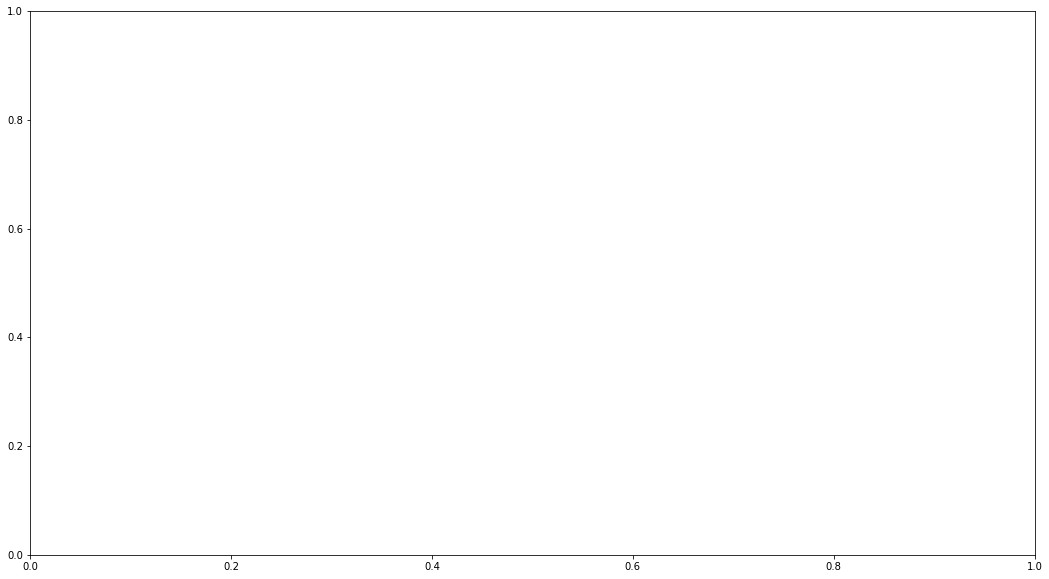

In [399]:
fig, ax = plt.subplots()
col = 1
#plt.text(family = "Helvetica")
for sex in sex_totals["Subject Sex_fixed"].unique():
    sex_df = sex_totals[sex_totals["Subject Sex_fixed"] == sex]
    ax.plot(sex_df["publication_year"], sex_df["total"], '-o', label=sex, linewidth=10, markersize=20, color = pclabcol2[col])
    col += 1
plt.legend(fontsize = 25, frameon = False)
plt.xticks(sex_df["publication_year"].unique(), fontsize = 25, rotation = 45)
plt.locator_params(axis='x', nbins=10)
plt.yticks(fontsize = 35)
plt.title("Subject sex across years", fontsize = 60)
plt.xlabel("Year", fontsize = 40)
plt.ylabel("Number of papers", fontsize = 40)
plt.savefig("./proc/plots/year_vs_sex.svg")

## Trends in Age of the Subject

In [347]:
survey_df["Subject Age"]

0                                       does not specify
1                             adult (week not specified)
2                                    adult (12-24 weeks)
3                                       Does not specify
4                               young adult (8-12 weeks)
                             ...                        
664                             young adult (8-12 weeks)
665             adult (12-24 weeks), adult (24-40 weeks)
666                                     Does not specify
667             adult (12-24 weeks), adult (24-40 weeks)
668    juvenile (3-7 weeks or week not specified), yo...
Name: Subject Age, Length: 669, dtype: object

In [348]:
column_name = "Subject Age"

In [349]:
fixed_column_name = column_name + "_fixed"

In [350]:
copy_of_survey_df = survey_df.copy()

In [351]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [352]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [353]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()
column_year_count

,publication_year,Subject Age_fixed,index,Timestamp :),Title,"First Author (Last, First) (no middle initials)",Publication Date (YYYY-MM),"Reviewer (your name, First Last i.e. Meghan Cum)","Verifier (name, good or bad)","Meets the sufficient criteria: uses mice or rats, is not a review or protocol paper, tests for social memory/recognition/discrimination",...,Social Agent Housing,Social Agent Rank,Social Agent Type,Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject,Additional novel social agent used at all?,Qualities Shared w/ Subject Mouse (i.e. same age between social agents and subject) [Social Agent],Do you have questions on this paper/should Meghan look this one over?,"If you answered yes to the previous question, what concerns/questions did you have specifically on this paper?",Mice used,Rats used
0,2000,adult (12-24 weeks),1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2000,adult (24-40 weeks),1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,2000,adult (week not specified),3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,2001,Does not specify,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,2001,adult (12-24 weeks),1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2021,juvenile (3-7 weeks),1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
136,2021,old (+40 weeks),4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
137,2021,young adult (8-12 weeks),36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
138,2022,juvenile (3-7 weeks or week not specified),2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [354]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

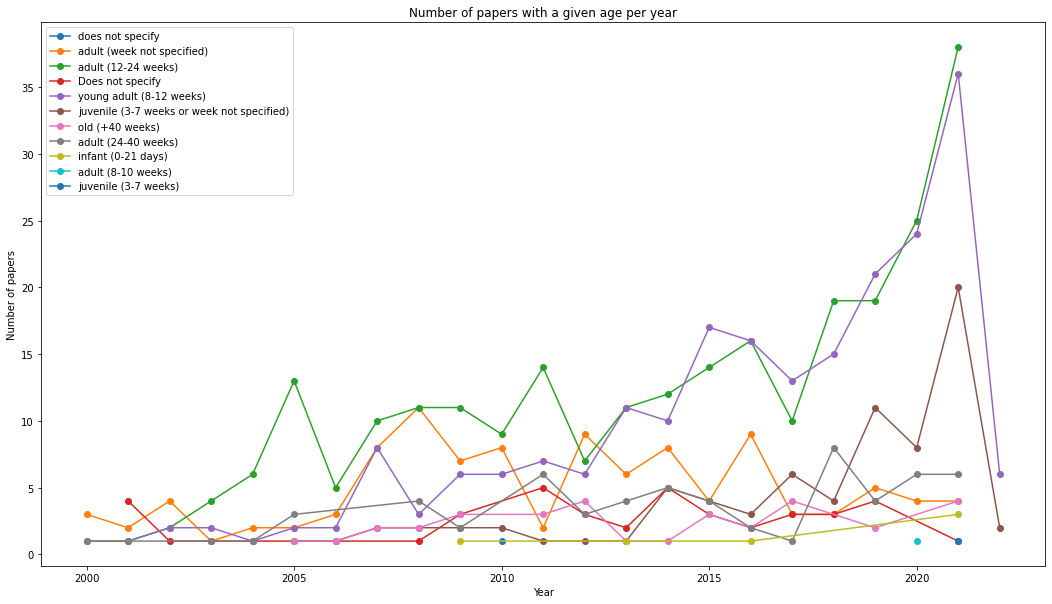

In [355]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given age per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_age.png")

## Trends in Housing of the Subject

In [356]:
survey_df["Subject Housing"]

0      Does not specify
1      Does not specify
2         singly-housed
3      Does not specify
4         singly-housed
             ...       
664       singly-housed
665        group-housed
666        group-housed
667       singly-housed
668        group-housed
Name: Subject Housing, Length: 669, dtype: object

In [357]:
column_name = "Subject Housing"

In [358]:
fixed_column_name = column_name + "_fixed"

In [359]:
copy_of_survey_df = survey_df.copy()

In [360]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [361]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [368]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()
column_year_count = column_year_count[['publication_year', fixed_column_name, 'index']]
column_year_count


,publication_year,Subject Housing_fixed,index
0,2000,group-housed,2
1,2000,singly-housed,4
2,2001,group-housed,2
3,2001,singly-housed,8
4,2002,group-housed,4
...,...,...,...
77,2021,singly-housed,16
78,2021,singly-housed for more than a few hours and le...,7
79,2022,group-housed,6
80,2022,singly-housed,1


In [369]:
column_year_count.drop(79, axis = 0, inplace=True)
column_year_count.drop(80, axis = 0, inplace=True)
column_year_count.drop(81, axis = 0, inplace=True)
column_year_count


,publication_year,Subject Housing_fixed,index
0,2000,group-housed,2
1,2000,singly-housed,4
2,2001,group-housed,2
3,2001,singly-housed,8
4,2002,group-housed,4
...,...,...,...
74,2020,singly-housed for more than a few hours and le...,3
75,2021,Does not specify,15
76,2021,group-housed,60
77,2021,singly-housed,16


In [375]:
housing_opt = column_year_count[fixed_column_name].unique()
housing_opt = housing_opt.tolist()


In [376]:
housing_count_list = column_year_count.values.tolist()

In [380]:
for options in housing_opt:
    for year in set(column_year_count['publication_year'].unique()) - set(column_year_count[column_year_count[fixed_column_name] == options]['publication_year'].unique()):
        housing_count_list.append([year, options, 0])


In [381]:
housing_totals = pd.DataFrame(housing_count_list, columns = ['publication_year', 'Subject Housing_fixed','total'])
housing_totals = housing_totals.groupby(['publication_year', 'Subject Housing_fixed', 'total'], as_index=False).count()
housing_totals

,publication_year,Subject Housing_fixed,total
0,2000,Does not specify,0
1,2000,group-housed,2
2,2000,singly-housed,4
3,2000,singly-housed for more than a few hours and le...,0
4,2001,Does not specify,0
...,...,...,...
83,2020,singly-housed for more than a few hours and le...,3
84,2021,Does not specify,15
85,2021,group-housed,60
86,2021,singly-housed,16


In [382]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

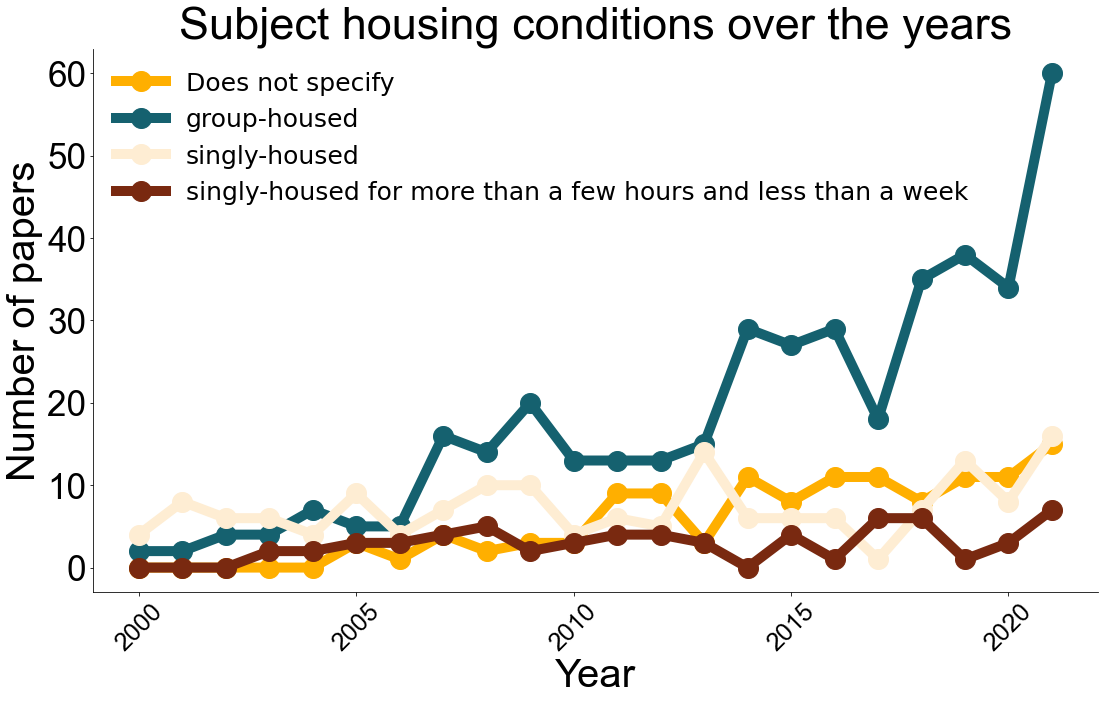

In [401]:
fig, ax = plt.subplots()
col = 1

for value in housing_totals[fixed_column_name].unique():
    type_df = housing_totals[housing_totals[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["total"], '-o', label=value, linewidth = LINWID, markersize = DOTS, color = pclabcol[col])
    col += 1
for pos in ['right', 'top']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)
plt.legend(fontsize = LEGSIZE ,frameon = False)
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Subject housing conditions over the years", fontsize = 45, family="Arial")
plt.xlabel("Year", fontsize = AXESLABEL, family="Arial")
plt.ylabel("Number of papers", fontsize = AXESLABEL, family="Arial")
plt.xticks(fontsize = 25, rotation = 45, family="Arial")
plt.yticks(fontsize = AXESTICKS, family="Arial")
plt.savefig("./proc/plots/year_vs_housing.svg")


## Trends in Age of the Subject

In [ ]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "].unique()

In [ ]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "]

In [ ]:
column_name = "Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "

In [ ]:
fixed_column_name = column_name + "_fixed"

In [ ]:
copy_of_survey_df = survey_df.copy()

In [ ]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [ ]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [ ]:
exploded_column_df


In [ ]:
column_year_count = exploded_column_df.groupby(['publication_year', fixed_column_name], as_index=False).count()

In [ ]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [ ]:
fig, ax = plt.subplots()

for value in exploded_column_df[fixed_column_name].unique():
    type_df = column_year_count[column_year_count[fixed_column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
# plt.xticks(column_year_count["publication_year"].unique())
plt.title("Number of papers with a given degree of familiarity per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_familiarity.png")

## Trends in Type of the Subject

In [ ]:
survey_df["Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"]

In [ ]:
column_name = "Social Discrimination Tested? i.e. novel and familiar social agents presented at the *same time* to the subject"

In [ ]:
type_year_count = all_processed_strains_df.groupby(['publication_year', column_name], as_index=False).count()

In [ ]:
type_year_count

In [ ]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [ ]:
fig, ax = plt.subplots()

for value in survey_df[column_name].unique():
    type_df = type_year_count[type_year_count[column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers that tested social discrimination per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_discrimination.png")

## Trends in Type of the Subject

In [ ]:
survey_df["Subject Social Rank"]

In [ ]:
column_name = "Subject Social Rank"

In [ ]:
type_year_count = all_processed_strains_df.groupby(['publication_year', column_name], as_index=False).count()

In [ ]:
type_year_count

In [ ]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (18,10)

In [ ]:
fig, ax = plt.subplots()

for value in survey_df[column_name].unique():
    type_df = type_year_count[type_year_count[column_name] == value]
    ax.plot(type_df["publication_year"], type_df["index"], '-o', label=value)
plt.legend()
plt.xticks(strain_year_count["publication_year"].unique())
plt.title("Number of papers with a given rank per year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.savefig("./proc/plots/year_vs_rank.png")

## ITI by Species

In [ ]:
survey_df["Intertrial Interval (ITI) (time between trials)"]

In [ ]:
column_name = "Intertrial Interval (ITI) (time between trials)"

In [ ]:
fixed_column_name = column_name + "_fixed"

In [ ]:
copy_of_survey_df = survey_df.copy()

In [ ]:
copy_of_survey_df[column_name]

In [ ]:
#copy_of_survey_df[ pd.api.types.is_float_dtype(copy_of_survey_df[column_name])]

In [ ]:
def debugfunc(x):
    print(x)
    return x.split(", ")


In [ ]:
copy_of_survey_df[column_name]

In [ ]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: debugfunc(x))

In [ ]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()

In [ ]:
column_rats_count = exploded_column_df.groupby(['Rats used', fixed_column_name], as_index=False).count()

In [ ]:
column_mice_count = exploded_column_df.groupby(['Mice used', fixed_column_name], as_index=False).count()

In [ ]:
edit_column_rats_count = column_rats_count[column_rats_count["Rats used"] == "1"]

In [ ]:
rat_count = edit_column_rats_count["index"].sum()

In [ ]:
rat_count

In [ ]:
edit_column_mice_count = column_mice_count[column_mice_count["Mice used"] == "1"]

In [ ]:
mouse_count = edit_column_mice_count["index"].sum()

In [ ]:
mouse_count

In [ ]:
edit_column_mice_count = edit_column_mice_count.set_index("Intertrial Interval (ITI) (time between trials)_fixed", inplace=False) 

In [ ]:
edit_column_rats_count = edit_column_rats_count.set_index("Intertrial Interval (ITI) (time between trials)_fixed", inplace=False) 

In [ ]:
edit_column_mice_count

In [ ]:
edit_column_mice_count = edit_column_mice_count.reindex(["no ITI","1-5 minutes","+5 min - less than an hour","1-6 hr", "over 6 hr - 24 hr", "over 24 hrs", "not specified"])

In [ ]:
edit_column_rats_count = edit_column_rats_count.reindex(["no ITI","1-5 minutes","+5 min - less than an hour","1-6 hr", "over 6 hr - 24 hr", "over 24 hrs", "not specified"])

In [ ]:
#edit_column_mice_count["Intertrial Interval (ITI) (time between trials)_fixed"]

In [ ]:
edit_column_mice_count["index"] = edit_column_mice_count["index"].mul(100)
edit_column_rats_count["index"] = edit_column_rats_count["index"].mul(100)
edit_column_mice_count

In [ ]:
edit_column_mice_count["index"] = edit_column_mice_count["index"].div(484)
edit_column_rats_count["index"] = edit_column_rats_count["index"].div(345)
edit_column_mice_count

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)

In [ ]:
_ITI = np.arange(len(edit_column_rats_count.index))

plt.bar(_ITI - 0.2, edit_column_mice_count["index"], 0.4, label = "Mice")
plt.bar(_ITI + 0.2, edit_column_rats_count["index"], 0.4, label = "Rats")
plt.xticks(_ITI, edit_column_rats_count.index)
plt.legend()
plt.title("ITI by Species")
plt.xlabel("ITI Length")
plt.ylabel("Percentage of papers")
plt.savefig("./proc/plots/ITIbyspecies.png")

# Degree of Familiarity

In [ ]:
survey_df["Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "]

In [ ]:
column_name = "Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) "

In [ ]:
fixed_column_name = column_name + "_fixed"

In [ ]:
copy_of_survey_df = survey_df.copy()

In [ ]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(", "))

In [ ]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [ ]:
column_degree_count = exploded_column_df.groupby([fixed_column_name], as_index=False).count()

In [ ]:
column_degree_count

# Social Agent Ages by Sex

In [ ]:
survey_df["Social Agent Sex"]

In [ ]:
survey_df["Social Agent Age (check all that apply)"]

In [ ]:
column_name = "Social Agent Sex"
column_name_2 = "Social Agent Age (check all that apply)"

In [ ]:
fixed_column_name = column_name + "_fixed"
fixed_column_name_2 = column_name_2 + "_fixed"

In [ ]:
copy_of_survey_df = survey_df.copy()

In [ ]:
def debugfunc(x):
    print(x)
    return x.split(", ")

In [ ]:
copy_of_survey_df[column_name]
copy_of_survey_df[column_name_2]

In [ ]:
copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: debugfunc(x))
copy_of_survey_df[fixed_column_name_2] = copy_of_survey_df[column_name_2].apply(lambda x: debugfunc(x))

In [ ]:
copy_of_survey_df

In [ ]:
exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()
exploded_column_df = exploded_column_df.explode(fixed_column_name_2).reset_index()

In [ ]:
exploded_column_df

In [ ]:
exploded_column_df["Male Social Agent"] = exploded_column_df[fixed_column_name].apply(lambda x: "1" if x == "always male" or x == "Uses both" else "0")
exploded_column_df["Female Social Agent"] = exploded_column_df[fixed_column_name].apply(lambda x: "1" if x == "always female" or x == "Uses both" else "0")

In [ ]:
column_male_count = exploded_column_df.groupby(['Male Social Agent', fixed_column_name_2], as_index=False).count()
edit_column_male_count = column_male_count[column_male_count["Male Social Agent"] == "1"]

column_female_count = exploded_column_df.groupby(['Female Social Agent', fixed_column_name_2], as_index=False).count()
edit_column_female_count = column_female_count[column_female_count["Female Social Agent"] == "1"]

edit_column_male_count

In [ ]:
edit_column_female_count

In [ ]:
exploded_column_df["Same Sex Social Agent"] = exploded_column_df["Social Agent Sex_fixed"].apply(lambda x: "1" if x == "same sex as subject" else "0")
exploded_column_df["Opposite Sex Social Agent"] = exploded_column_df["Social Agent Sex_fixed"].apply(lambda x: "1" if x == "opposite sex as subject" else "0")

In [ ]:
column_same_count = exploded_column_df.groupby(['Same Sex Social Agent', fixed_column_name_2], as_index=False).size()
edit_column_same_count = column_same_count[column_same_count["Same Sex Social Agent"] == "1"]

column_opposite_count = exploded_column_df.groupby(['Opposite Sex Social Agent', fixed_column_name_2], as_index=False).size()
edit_column_opposite_count = column_opposite_count[column_opposite_count["Opposite Sex Social Agent"] == "1"]

In [ ]:
infant_dict = {"Opposite Sex Social Agent": ["1"], "Social Agent Age (check all that apply)_fixed": ["infant (0-21 days)"], "size": [0]}
  
infant_df = pd.DataFrame.from_dict(infant_dict)
  
edit_column_opposite_count = pd.concat([edit_column_opposite_count, infant_df], ignore_index = True)


In [ ]:
edit_column_opposite_count


In [ ]:
edit_column_male_count = edit_column_male_count.set_index(fixed_column_name_2, inplace=False) 
edit_column_female_count = edit_column_female_count.set_index(fixed_column_name_2, inplace=False) 

In [ ]:
edit_column_same_count = edit_column_same_count.set_index("Social Agent Age (check all that apply)_fixed", inplace=False) 
edit_column_opposite_count = edit_column_opposite_count.set_index("Social Agent Age (check all that apply)_fixed", inplace=False) 

In [ ]:
edit_column_opposite_count

In [ ]:
edit_column_male_count = edit_column_male_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])
edit_column_female_count = edit_column_female_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])
edit_column_same_count = edit_column_same_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])
edit_column_opposite_count = edit_column_opposite_count.reindex(["infant (0-21 days)", "juvenile (3-7 weeks or week not specified)", "adult (week not specified)", "young adult (8-12 weeks)", "adult (12-24 weeks)", "adult (24-40 weeks)", "old (+40 weeks)", "does not specify"])


In [ ]:
edit_column_male_count["index"].sum()

In [ ]:
edit_column_female_count["index"].sum()

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)

In [ ]:
_ITI = np.arange(len(edit_column_male_count.index))

plt.bar(_ITI - 0.2, edit_column_male_count["index"] / 469 * 100, 0.4, label = "Male")
plt.bar(_ITI + 0.2, edit_column_female_count["index"] / 226 * 100, 0.4, label = "Female")
plt.xticks(_ITI, edit_column_male_count.index)
plt.legend(fontsize= 15)
plt.xticks(rotation=45, fontsize = 15)
plt.title("Ages by Social Agent Sexes", fontsize = 25)
plt.xlabel("Age Ranges", fontsize = 20)
plt.ylabel("Percent of male or female papers, respectively", fontsize = 20)
plt.savefig("./proc/plots/AgebySASex.png")

In [ ]:
edit_column_opposite_count["size"].sum()

In [ ]:
edit_column_same_count["size"].sum()

In [ ]:
_ITI = np.arange(len(edit_column_same_count.index))

plt.bar(_ITI - 0.2, edit_column_same_count["size"] / 449 * 100, 0.4, label = "Sex Matched")
plt.bar(_ITI + 0.2, edit_column_opposite_count["size"] / 66 * 100, 0.4, label = "Opposite Sex")
plt.xticks(_ITI, edit_column_same_count.index)
plt.legend(fontsize = 15)
plt.xticks(rotation=45, fontsize=15)
plt.title("Ages by Sex-Matched vs Opposite Sex Social Agents", fontsize=25)
plt.xlabel("Age Ranges", fontsize=20)
plt.ylabel("Percent of sex-matched or opposite sex papers, respectively", fontsize=20)
plt.savefig("./proc/plots/AgebySASexMatch.png")